 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index(ascending = True, inplace = True)
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [7]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [9]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.sort_index(ascending = True, inplace = True)
algo_returns_df.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [11]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.head()

Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(ascending = True, inplace = True)
sp500_history_df.head()

Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93

In [15]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [17]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [19]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [20]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [22]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close":"S&P500"})
sp500_daily_returns.head()

S&P500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='columns', join='inner')
combined_portfolios_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2    S&P500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

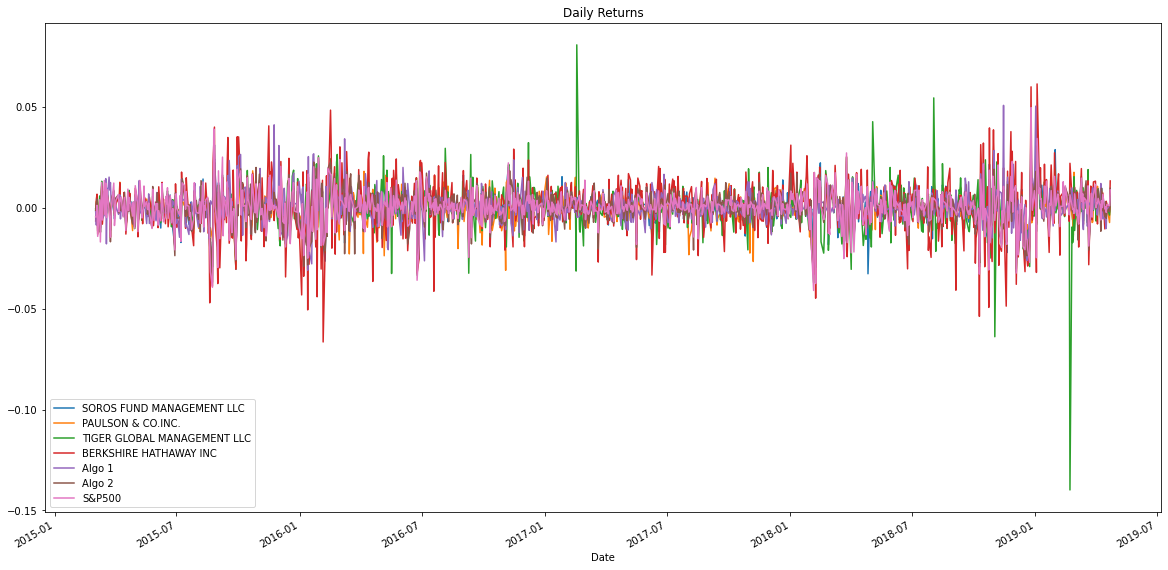

In [24]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

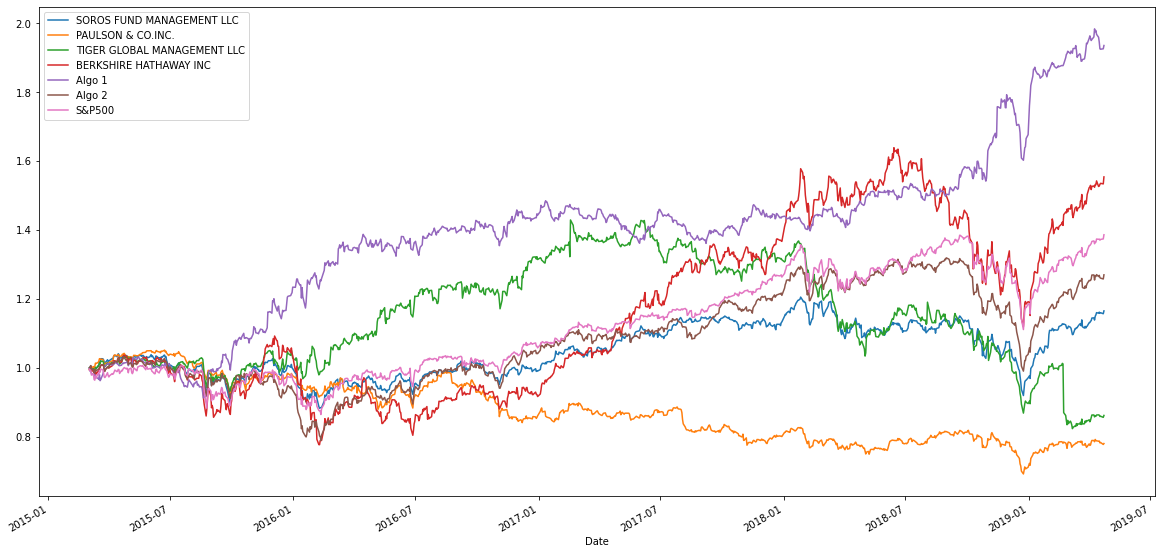

In [25]:
# Calculate cumulative returns of all portfolios
combined_portfolios_cumulative_returns = (1 + combined_portfolios_df).cumprod()

# Plot cumulative returns
combined_portfolios_cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

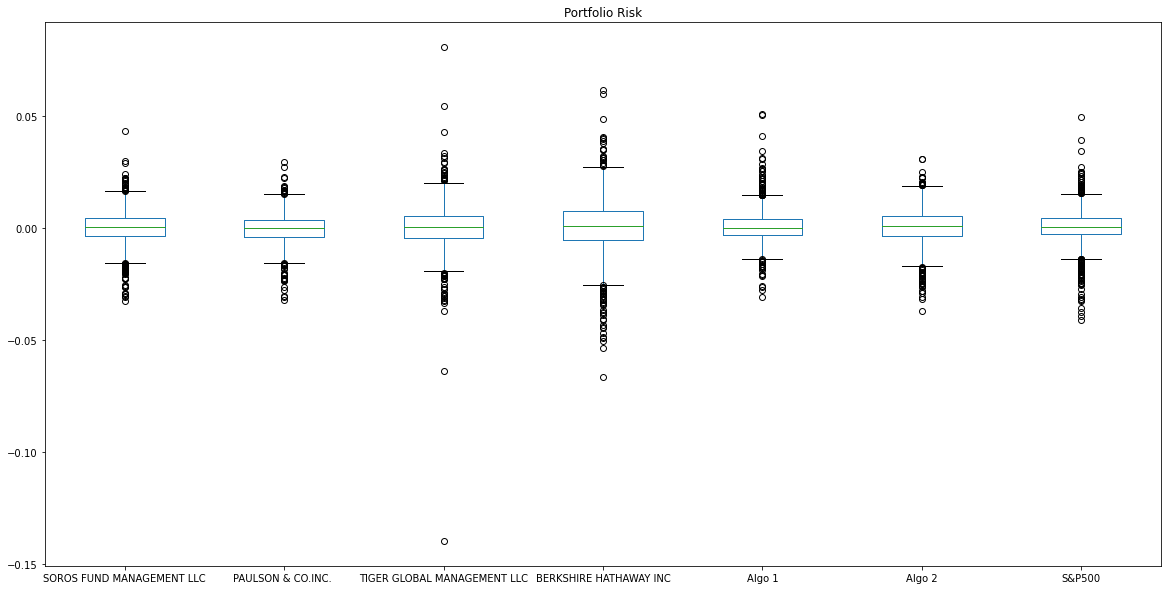

In [28]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title="Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios
combined_portfolio_daily_std = combined_portfolios_df.std().sort_values(ascending=False)
combined_portfolio_daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [33]:
# Calculate the daily standard deviation of S&P 500
sp500_std = combined_portfolio_daily_std['S&P500']

# Determine which portfolios are riskier than the S&P 500
portfolios_riskier_than_SP500 = combined_portfolio_daily_std > sp500_std
portfolios_riskier_than_SP500

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
S&P500                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized standard deviation (252 trading days)
combined_portfolio_annualized_std = daily_std *np.sqrt(252)
combined_portfolio_annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

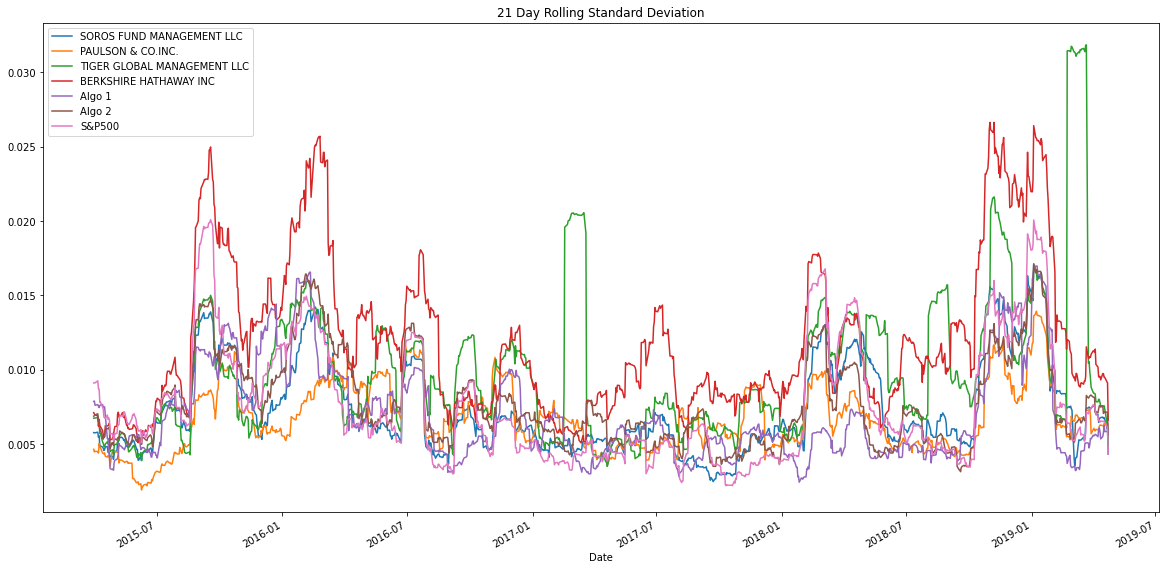

In [35]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios_rolling21_std = combined_portfolios_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_portfolios_rolling21_std.plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

In [39]:
# Calculate the correlation
combined_portfolios_correlation = combined_portfolios_df.corr()

# Display de correlation matrix
combined_portfolios_correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P500                                        0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
S&P500                                          0.623946   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
S&P500                                     0.751371  0.279494  0.858764   

                               S&P500  
SOROS FUND MANAGEMENT LLC    0.837864  
PAULSON & CO.INC.            0.669732  
TIGER GLOBAL MANAGEMENT LLC  0.623946  
BERKSHIRE HATHAWAY INC       0.751371  
Algo 1                       0.279494  
Algo 2                       0.858764  
S&P500                       1.000000

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC Beta Trend'}, xlabel='Date'>

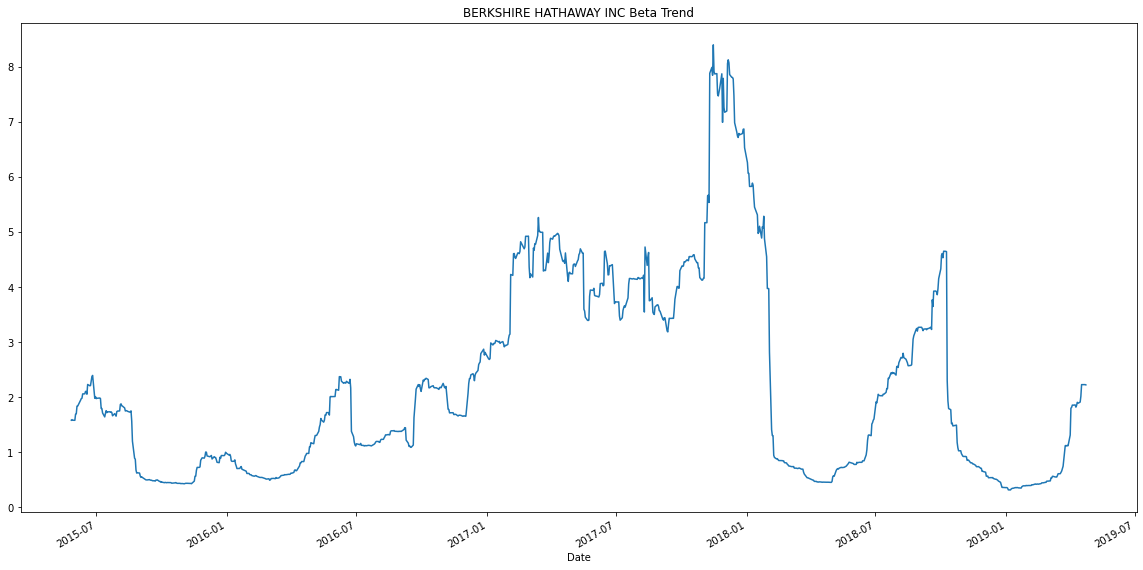

In [47]:
# Calculate covariance of a single portfolio
berkshire_hathaway_covariance = combined_portfolios_df['BERKSHIRE HATHAWAY INC'].cov(combined_portfolios_df['S&P500'])

# Calculate variance of S&P 500
sp500_variance = combined_portfolios_df['S&P500'].rolling(window=60).var()

# Computing beta
berkshire_hathaway_beta_sp500 = berkshire_hathaway_covariance/sp500_variance

# Plot beta trend
berkshire_hathaway_beta_sp500.plot(title="BERKSHIRE HATHAWAY INC Beta Trend", figsize=(20, 10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'21-Day Exponentialy Weighted Average'}, xlabel='Date'>

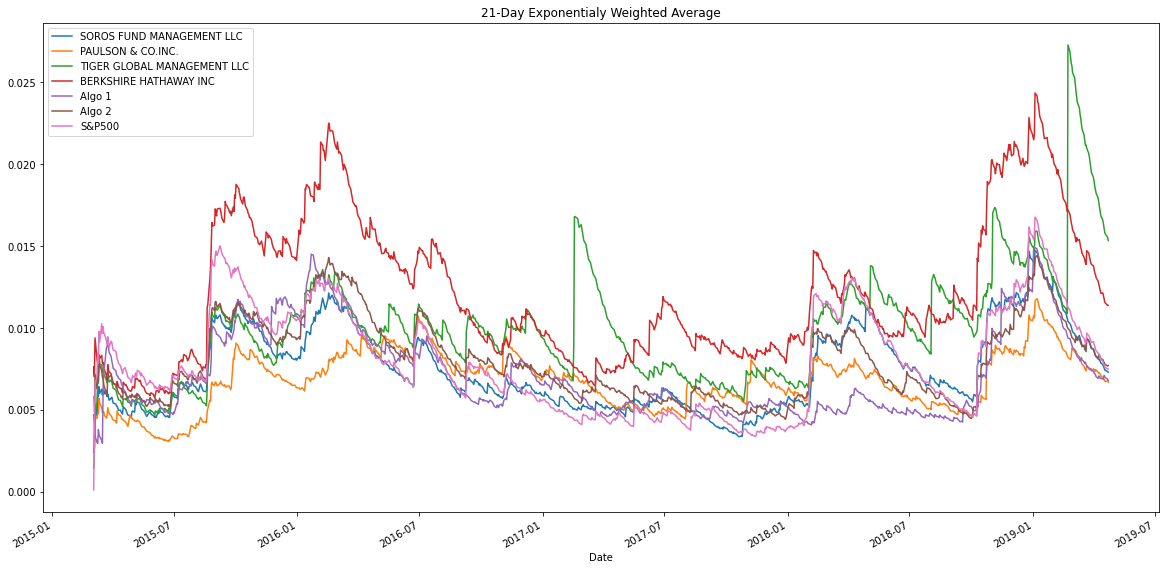

In [49]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="21-Day Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

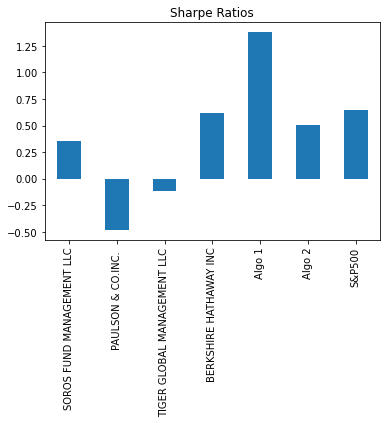

In [51]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios") 

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [98]:
# Reading data from 1st stock
google_history_csv = Path("Resources/goog_historical.csv")
google_history_df = pd.read_csv(google_history_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
google_history_df.head()

Symbol     NOCP
Trade DATE                
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40

In [99]:
# Reading data from 2nd stock
apple_history_csv = Path("Resources/aapl_historical.csv")
apple_history_df = pd.read_csv(apple_history_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
apple_history_df.head()

Symbol    NOCP
Trade DATE               
2019-05-09   AAPL  200.72
2019-05-08   AAPL  202.90
2019-05-07   AAPL  202.86
2019-05-06   AAPL  208.48
2019-05-03   AAPL  211.75

In [100]:
# Reading data from 3rd stock
costco_history_csv = Path("Resources/cost_historical.csv")
costco_history_df = pd.read_csv(costco_history_csv, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
costco_history_df.head()

Symbol    NOCP
Trade DATE               
2019-05-09   COST  243.47
2019-05-08   COST  241.34
2019-05-07   COST  240.18
2019-05-06   COST  244.23
2019-05-03   COST  244.62

In [101]:
# Combine all stocks in a single DataFrame
my_portfolio_combined_df = pd.concat([google_history_df, apple_history_df, costco_history_df], axis="columns", join="inner")
my_portfolio_combined_df

Symbol     NOCP Symbol    NOCP Symbol    NOCP
Trade DATE                                              
2019-05-09   GOOG  1162.38   AAPL  200.72   COST  243.47
2019-05-08   GOOG  1166.27   AAPL  202.90   COST  241.34
2019-05-07   GOOG  1174.10   AAPL  202.86   COST  240.18
2019-05-06   GOOG  1189.39   AAPL  208.48   COST  244.23
2019-05-03   GOOG  1185.40   AAPL  211.75   COST  244.62
...           ...      ...    ...     ...    ...     ...
2018-05-17   GOOG  1078.59   AAPL  186.99   COST  199.60
2018-05-16   GOOG  1081.77   AAPL  188.18   COST  198.71
2018-05-15   GOOG  1079.23   AAPL  186.44   COST  195.48
2018-05-14   GOOG  1100.20   AAPL  188.15   COST  195.88
2018-05-11   GOOG  1098.26   AAPL  188.59   COST  195.76

[250 rows x 6 columns]

In [102]:
# Reset Date index
my_portfolio_combined_df.sort_index(inplace=True)
my_portfolio_combined_df

Symbol     NOCP Symbol    NOCP Symbol    NOCP
Trade DATE                                              
2018-05-11   GOOG  1098.26   AAPL  188.59   COST  195.76
2018-05-14   GOOG  1100.20   AAPL  188.15   COST  195.88
2018-05-15   GOOG  1079.23   AAPL  186.44   COST  195.48
2018-05-16   GOOG  1081.77   AAPL  188.18   COST  198.71
2018-05-17   GOOG  1078.59   AAPL  186.99   COST  199.60
...           ...      ...    ...     ...    ...     ...
2019-05-03   GOOG  1185.40   AAPL  211.75   COST  244.62
2019-05-06   GOOG  1189.39   AAPL  208.48   COST  244.23
2019-05-07   GOOG  1174.10   AAPL  202.86   COST  240.18
2019-05-08   GOOG  1166.27   AAPL  202.90   COST  241.34
2019-05-09   GOOG  1162.38   AAPL  200.72   COST  243.47

[250 rows x 6 columns]

In [103]:
# Reorganize portfolio data by having a column per symbol
my_portfolio_combined_df.columns = ['TICKER', 'GOOG', 'TICKER', 'AAPL','TICKER','COST']
my_portfolio_combined_df.drop(columns=['TICKER'], axis=1,inplace = True)
my_portfolio_combined_df

GOOG    AAPL    COST
Trade DATE                         
2018-05-11  1098.26  188.59  195.76
2018-05-14  1100.20  188.15  195.88
2018-05-15  1079.23  186.44  195.48
2018-05-16  1081.77  188.18  198.71
2018-05-17  1078.59  186.99  199.60
...             ...     ...     ...
2019-05-03  1185.40  211.75  244.62
2019-05-06  1189.39  208.48  244.23
2019-05-07  1174.10  202.86  240.18
2019-05-08  1166.27  202.90  241.34
2019-05-09  1162.38  200.72  243.47

[250 rows x 3 columns]

In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!